In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns
sns.set_style("whitegrid")


In [23]:
df_main = pd.read_csv('Crawl/Data/Perfume_Data3.csv')
df_main.head()

,sothutu,Tên_Sản_Phẩm,Thương_Hiệu,Giá_Bán,Giá_Gốc,Dung_Tich,Phần_Trăm_Giảm
0,0,Nước Hoa Nữ Diamond Femme (Trắng),Eau De Parfum,301000,549000,45ml,45
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh Mẽ,Inner Perfume #Eau De Bijou,144000,350000,5ml,59
2,2,Nước Hoa Nữ Diamond Femme Pink (Hồng),Eau De Parfum,275000,549000,45ml,50
3,3,Nước Hoa Nam Diamond Homme (Đen),Eau De Parfum,275000,549000,45ml,50
4,4,Nước Hoa Nữ Diamond Femme Ruby Red (Đỏ),Eau De Parfum,301000,549000,45ml,45


In [24]:
print(df_main.shape)

(1000, 7)


In [25]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sothutu         1000 non-null   int64 
 1   Tên_Sản_Phẩm    1000 non-null   object
 2   Thương_Hiệu     858 non-null    object
 3   Giá_Bán         1000 non-null   int64 
 4   Giá_Gốc         1000 non-null   int64 
 5   Dung_Tich       1000 non-null   object
 6   Phần_Trăm_Giảm  1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [26]:
df_main.describe()

,sothutu,Giá_Bán,Giá_Gốc,Phần_Trăm_Giảm
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,507.575000,2.487787e+06,3.308818e+06,25.948000
std,293.167924,3.243318e+06,4.274206e+06,16.815471
min,0.000000,4.400000e+04,6.900000e+04,0.000000
25%,252.750000,3.540000e+05,5.070000e+05,10.000000
50%,507.500000,8.950000e+05,1.200000e+06,25.000000
75%,761.250000,3.631750e+06,4.442500e+06,38.250000
max,1014.000000,1.966500e+07,2.495000e+07,70.000000


In [27]:
print(df_main.isna().sum())

sothutu             0
Tên_Sản_Phẩm        0
Thương_Hiệu       142
Giá_Bán             0
Giá_Gốc             0
Dung_Tich           0
Phần_Trăm_Giảm      0
dtype: int64


In [ ]:
# Chuyển đổi giá trị thành số thực
df_main['discount_percent'] = pd.to_numeric(df_main['sale'], errors='coerce')


In [ ]:
# Xử lý cột 'sale' để chuyển đổi thành phần trăm giảm giá
# Loại bỏ ký hiệu phần trăm và các ký tự không mong muốn
df_main['sale'] = df_main['sale'].str.replace('%', '').str.replace('(', '').str.replace(')', '').str.replace('-', '')


In [ ]:
# Đổi tên cột cho phù hợp với ngữ cảnh
df_main.rename(columns={
    'name': 'Tên_Sản_Phẩm', 
    'brand': 'Thương_Hiệu', 
    'pricenew': 'Giá_Bán', 
    'priceold': 'Giá_Gốc', 
    'discount_percent': 'Phần_Trăm_Giảm', 
    'volume': 'Dung_Tich'
}, inplace=True)

In [ ]:
# Loại bỏ các cột không cần thiết
df_main.drop(columns=['sale'], inplace=True)


In [29]:
# Hiển thị dataframe đã được chỉnh sửa
df_main.head()

,sothutu,Tên_Sản_Phẩm,Thương_Hiệu,Giá_Bán,Giá_Gốc,Dung_Tich,Phần_Trăm_Giảm
0,0,Nước Hoa Nữ Diamond Femme (Trắng),Eau De Parfum,301000,549000,45ml,45
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh Mẽ,Inner Perfume #Eau De Bijou,144000,350000,5ml,59
2,2,Nước Hoa Nữ Diamond Femme Pink (Hồng),Eau De Parfum,275000,549000,45ml,50
3,3,Nước Hoa Nam Diamond Homme (Đen),Eau De Parfum,275000,549000,45ml,50
4,4,Nước Hoa Nữ Diamond Femme Ruby Red (Đỏ),Eau De Parfum,301000,549000,45ml,45


In [30]:
df_main.to_csv('Crawl/Data/Perfume_Data3.csv', index=False)


In [31]:
# Phân tích dữ liệu thăm dò (EDA)
# Định nghĩa các cột phân loại để trực quan hóa
cat_cols = ['Thương_Hiệu']

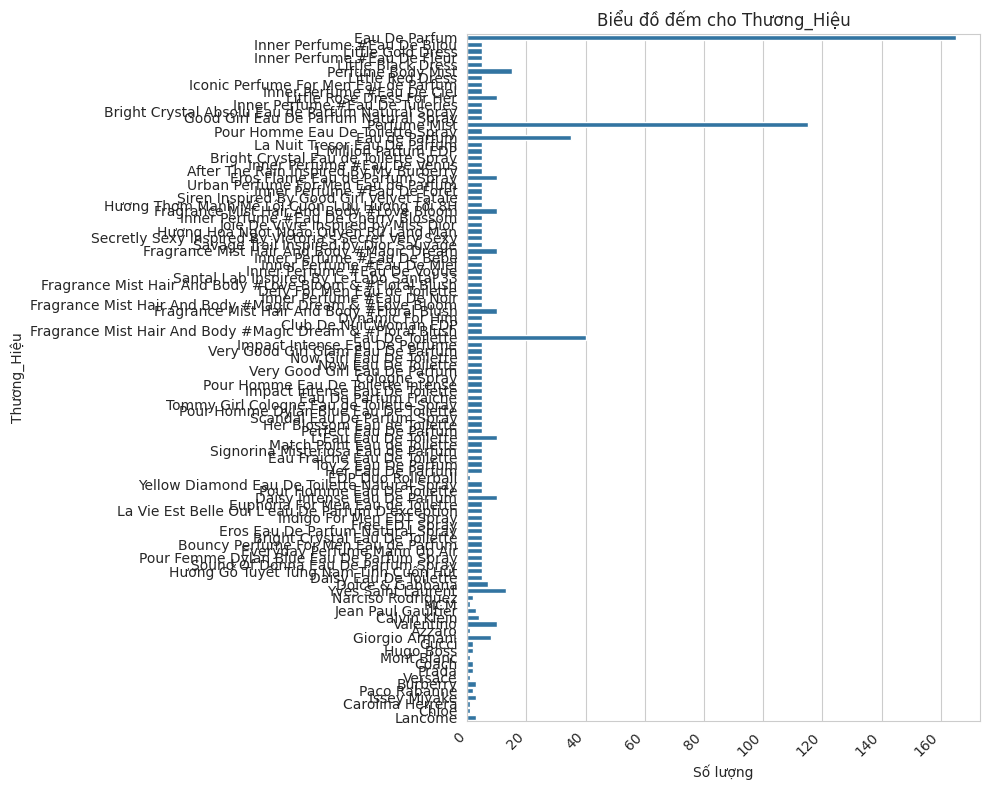

In [32]:
# Vẽ biểu đồ đếm cho các cột phân loại
for col in cat_cols:
    plt.figure(figsize=[10, 8])  # Tăng chiều cao của biểu đồ để phù hợp với nhiều nhãn hàng
    sns.countplot(y=col, data=df_main)  # Đổi x=col thành y=col
    plt.title(f'Biểu đồ đếm cho {col}')
    plt.xlabel('Số lượng')  # Nhãn trục x
    plt.ylabel(col)  # Nhãn trục y là tên cột
    plt.xticks(rotation=45, ha='right')  # Xoay nhãn trên trục x để tránh chồng chéo
    plt.tight_layout()  # Đảm bảo bố cục không bị cắt xén
    plt.show()


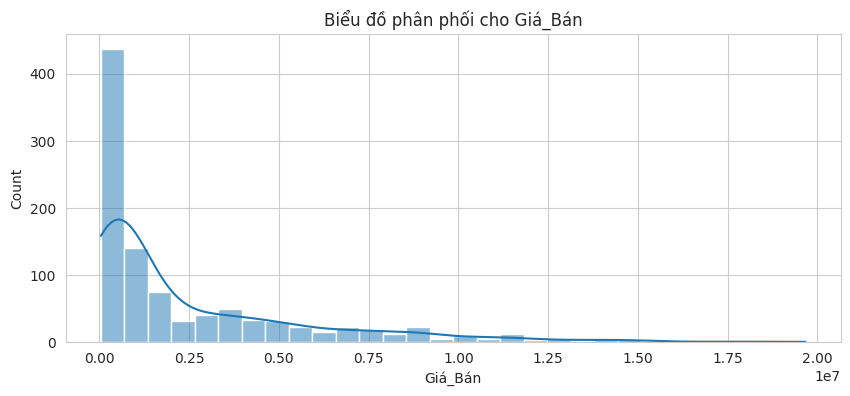

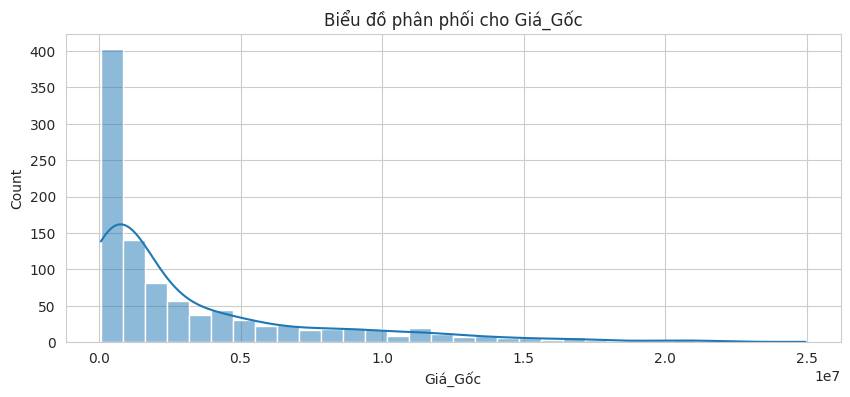

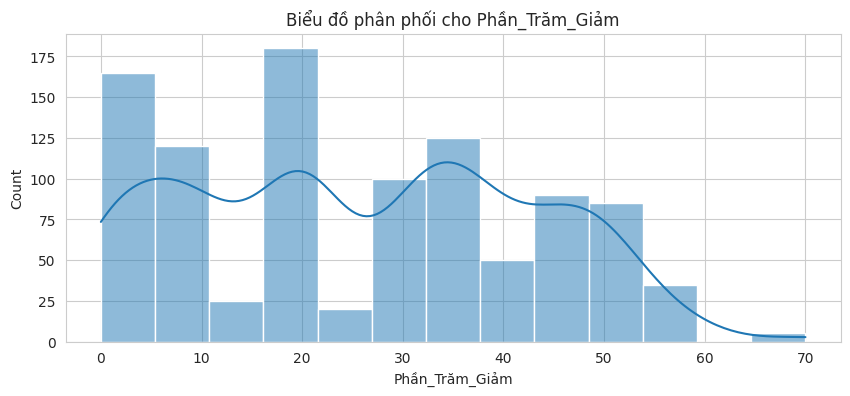

In [33]:
# Nếu bạn có các cột số liệu muốn phân tích, bạn có thể vẽ biểu đồ phân phối
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
for col in num_cols:
    plt.figure(figsize=[10, 4])
    sns.histplot(df_main[col], kde=True)
    plt.title(f'Biểu đồ phân phối cho {col}')
    plt.show()

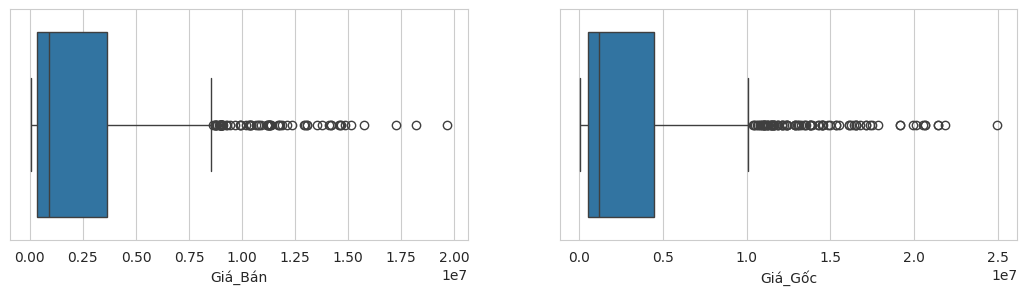

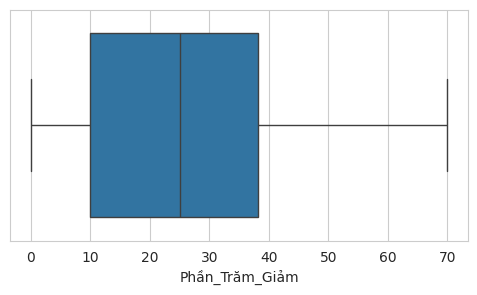

In [34]:
# Định nghĩa các cột số liệu để phân tích
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
i = 0
while i < len(num_cols):
    fig = plt.figure(figsize=[13, 3])
    
    # Vẽ biểu đồ boxplot cho từng cột
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    if i < len(num_cols):  # Kiểm tra để tránh vượt quá danh sách các cột
        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_cols[i], data=df_main)
        i += 1
    
    plt.show()

In [35]:
# Giả sử df_main đã được định nghĩa từ trước
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']

# Tạo bảng số liệu thống kê
stats_table = df_main[num_cols].describe().transpose()
stats_table['median'] = df_main[num_cols].median()

# Hiển thị bảng số liệu thống kê
print(stats_table)

                 count         mean           std      min       25%  \
Giá_Bán         1000.0  2487787.000  3.243318e+06  44000.0  354000.0   
Giá_Gốc         1000.0  3308818.000  4.274206e+06  69000.0  507000.0   
Phần_Trăm_Giảm  1000.0       25.948  1.681547e+01      0.0      10.0   

                      50%         75%         max     median  
Giá_Bán          895000.0  3631750.00  19665000.0   895000.0  
Giá_Gốc         1200000.0  4442500.00  24950000.0  1200000.0  
Phần_Trăm_Giảm       25.0       38.25        70.0       25.0  


In [36]:
# Hiển thị các hàng có giá bán cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Bán'] > df_main['Giá_Bán'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
736      748  Nước Hoa Nữ Narciso Rodriguez Pure Musc For He...   
739      751  Nước Hoa Nữ Carolina Herrera Very Good Girl Gl...   
842      856     Nước Hoa Nam Paco Rabanne 1 Million Parfum EDP   
917      932          Nước Hoa Nữ Narciso Rodriguez For Her EDP   
921      936  Nước Hoa Nữ Narciso Rodriguez Pure Musc For He...   
924      939  Nước Hoa Nữ Carolina Herrera Very Good Girl Gl...   
933      948        Nước Hoa Nữ Issey Miyake A Drop D'Issey EDP   
955      970                       Nước Hoa Nữ Chloé Nomade EDP   
962      977                       Nước Hoa Nữ Burberry Her EDP   
975      990                    Nước Hoa Nữ Chloé Eau De Parfum   

                           Thương_Hiệu   Giá_Bán   Giá_Gốc Dung_Tich  \
736                      Eau De Parfum  14548000  15320000     400ml   
739  Very Good Girl Glam Eau De Parfum  15732000  17480000     320ml   
842               1 Million Parfum EDP  151200

In [37]:

# Hiển thị các hàng có giá gốc cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Gốc'] > df_main['Giá_Gốc'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
777      789                       Nước Hoa Nữ Burberry Her EDP   
924      939  Nước Hoa Nữ Carolina Herrera Very Good Girl Gl...   
951      966               Nước Hoa Nữ Burberry Her Blossom EDT   
953      968                Nước Hoa Nữ Marc Jacobs Perfect EDP   
954      969            Nước Hoa Nữ Chloé L'Eau Eau De Toilette   
955      970                       Nước Hoa Nữ Chloé Nomade EDP   
959      974  [HSD 03/2025] Nước Hoa Nữ Chloé L'Eau Eau De T...   
962      977                       Nước Hoa Nữ Burberry Her EDP   
975      990                    Nước Hoa Nữ Chloé Eau De Parfum   

                           Thương_Hiệu   Giá_Bán   Giá_Gốc Dung_Tich  \
777                  Her Eau De Parfum  11868000  19960000     400ml   
924  Very Good Girl Glam Eau De Parfum  19665000  21850000     400ml   
951        Her Blossom Eau de Toilette  13515000  20150000     500ml   
953              Perfect Eau De Parfum  1

In [38]:
# Hiển thị các hàng có phần trăm giảm giá cao hơn ngưỡng 99%
print(df_main[df_main['Phần_Trăm_Giảm'] > df_main['Phần_Trăm_Giảm'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
178      181  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   
435      441  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   
620      629  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   
805      817  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   
990     1005  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   

                            Thương_Hiệu  Giá_Bán   Giá_Gốc Dung_Tich  \
178  Sound Of Donna Eau De Parfum Spray   726000   2420000     100ml   
435  Sound Of Donna Eau De Parfum Spray  1452000   4840000     200ml   
620  Sound Of Donna Eau De Parfum Spray  2178000   7260000     300ml   
805  Sound Of Donna Eau De Parfum Spray  2904000   9680000     400ml   
990  Sound Of Donna Eau De Parfum Spray  3630000  12100000     500ml   

     Phần_Trăm_Giảm  
178              70  
435              70  
620              70  
805              70  
990              70  


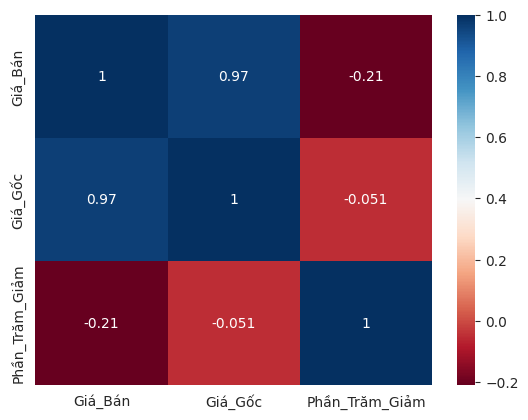

Giá_Bán           1.000000
Giá_Gốc           0.966708
Phần_Trăm_Giảm   -0.209110
Name: Giá_Bán, dtype: float64


In [39]:
# Lọc các cột số liệu
numeric_df = df_main[['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']]

# Vẽ biểu đồ heatmap để hiển thị tương quan giữa các biến
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

# Hiển thị tương quan của cột 'Giá_Bán' với các cột khác
print(numeric_df.corr()['Giá_Bán'])
